## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

In [1]:
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt

Using TensorFlow backend.


### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

### Find no.of samples are there in training and test datasets

In [5]:
len(x_train)

60000

In [6]:
len(x_test)

10000

*There are a total of 60000 records in the Train Data Set. There are 10000 Records in Test Data Set*

### Find dimensions of an image in the dataset

In [7]:
x_train.shape

(60000, 28, 28)

* the dimension of the image is 28*28

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
# convert class vectors to binary class matrices
y_train_class = keras.utils.to_categorical(y_train, 10)

In [0]:
y_test_class = keras.utils.to_categorical(y_test, 10)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train_conv =  x_train.astype("float32") / 255
x_test_conv = x_test.astype("float32") / 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train_conv = x_train_conv.reshape(x_train.shape[0], 28, 28, 1)
x_test_conv = x_test_conv.reshape(x_test.shape[0], 28, 28, 1)

In [0]:
input_shape = (28, 28, 1)

### Import the necessary layers from keras to build the model

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout
from keras import backend as K

### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [16]:
model_1_conv = Sequential()
model_1_conv.add(Conv2D(32, (3, 3), activation ="relu", input_shape=(28, 28, 1)))
model_1_conv.add(Conv2D(32, (3, 3), activation ="relu"))
model_1_conv.add(Flatten())
model_1_conv.add(Dense(128, activation='relu'))
model_1_conv.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [17]:
model_1_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2359424   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 2,370,282
Trainable params: 2,370,282
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_1_conv.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [19]:
%%time

earlyStopping=keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')
output_1_conv = model_1_conv.fit(x_train_conv, y_train_class, batch_size=50, epochs=10, callbacks=[earlyStopping], verbose=2,
                    validation_data=(x_test_conv, y_test_class))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 14s - loss: 0.3816 - acc: 0.8632 - val_loss: 0.3099 - val_acc: 0.8903
Epoch 2/10
 - 12s - loss: 0.2377 - acc: 0.9118 - val_loss: 0.2517 - val_acc: 0.9081
Epoch 3/10
 - 12s - loss: 0.1773 - acc: 0.9335 - val_loss: 0.2593 - val_acc: 0.9114
Epoch 4/10
 - 12s - loss: 0.1278 - acc: 0.9525 - val_loss: 0.2551 - val_acc: 0.9158
Epoch 5/10
 - 12s - loss: 0.0902 - acc: 0.9670 - val_loss: 0.2867 - val_acc: 0.9167
Epoch 6/10
 - 12s - loss: 0.0635 - acc: 0.9768 - val_loss: 0.3125 - val_acc: 0.9152
Epoch 7/10
 - 12s - loss: 0.0430 - acc: 0.9851 - val_loss: 0.3529 - val_acc: 0.9143
CPU times: user 1min 19s, sys: 21.6 s, total: 1min 41s
Wall time: 1min 25s


### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [20]:
model_2_conv = Sequential()
model_2_conv.add(Conv2D(32, (3, 3), activation ="relu", input_shape=(28, 28, 1)))
model_2_conv.add(MaxPooling2D(pool_size=(2, 2)))
model_2_conv.add(Conv2D(32, (3, 3), activation ="relu"))
model_2_conv.add(Dropout(0.25))
model_2_conv.add(Flatten())
model_2_conv.add(Dense(128, activation='relu'))
model_2_conv.add(Dense(10, activation='softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [21]:
model_2_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               495744    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total para

In [0]:
model_2_conv.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [23]:
%%time
earlyStopping=keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')
output_2_conv = model_2_conv.fit(x_train_conv, y_train_class, batch_size=50, epochs=10, callbacks=[earlyStopping], verbose=2,
                    validation_data=(x_test_conv, y_test_class))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 9s - loss: 0.4429 - acc: 0.8409 - val_loss: 0.3146 - val_acc: 0.8870
Epoch 2/10
 - 9s - loss: 0.2941 - acc: 0.8938 - val_loss: 0.2842 - val_acc: 0.8953
Epoch 3/10
 - 9s - loss: 0.2498 - acc: 0.9080 - val_loss: 0.2580 - val_acc: 0.9073
Epoch 4/10
 - 9s - loss: 0.2203 - acc: 0.9195 - val_loss: 0.2458 - val_acc: 0.9091
Epoch 5/10
 - 9s - loss: 0.1973 - acc: 0.9271 - val_loss: 0.2285 - val_acc: 0.9166
Epoch 6/10
 - 9s - loss: 0.1740 - acc: 0.9352 - val_loss: 0.2347 - val_acc: 0.9154
Epoch 7/10
 - 9s - loss: 0.1551 - acc: 0.9437 - val_loss: 0.2306 - val_acc: 0.9206
Epoch 8/10
 - 9s - loss: 0.1393 - acc: 0.9478 - val_loss: 0.2332 - val_acc: 0.9205
Epoch 9/10
 - 9s - loss: 0.1247 - acc: 0.9527 - val_loss: 0.2468 - val_acc: 0.9210
Epoch 10/10
 - 9s - loss: 0.1095 - acc: 0.9586 - val_loss: 0.2459 - val_acc: 0.9196
CPU times: user 1min 39s, sys: 17.3 s, total: 1min 56s
Wall time: 1min 28s


### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
# this will do preprocessing and realtime data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    rotation_range=25,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

In [0]:
# Set up the generator
datagen.fit(x_train_conv)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

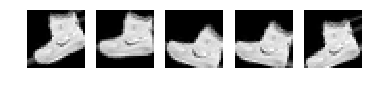

In [27]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train_conv[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [28]:
%%time
output_2_conv = model_2_conv.fit_generator(datagen.flow(x_train_conv, y_train_class, batch_size=50),
                    validation_data=(x_test_conv, y_test_class), use_multiprocessing=True,
                     steps_per_epoch=len(x_train_conv) / 32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.4910 - acc: 0.8170 - val_loss: 0.3137 - val_acc: 0.8888
Epoch 2/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3914 - acc: 0.8550 - val_loss: 0.2968 - val_acc: 0.8962
Epoch 3/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3630 - acc: 0.8656 - val_loss: 0.2923 - val_acc: 0.8931
Epoch 4/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3442 - acc: 0.8715 - val_loss: 0.2778 - val_acc: 0.8979
Epoch 5/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3306 - acc: 0.8766 - val_loss: 0.2821 - val_acc: 0.8966
CPU times: user 1min 37s, sys: 9.62 s, total: 1min 46s
Wall time: 2min 47s


###  Report the final train and validation accuracy

In [29]:
score = model_2_conv.evaluate(x_test_conv,y_test_class)

10000/10000 [==============================] - 1s 74us/step


In [31]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.28212562103867533
Test accuracy: 0.8966


In [32]:
score1 = model_2_conv.evaluate(x_train_conv,y_train_class)

60000/60000 [==============================] - 4s 72us/step


In [34]:
print('Train loss:', score1[0])
print('Train accuracy:', score1[1])

Train loss: 0.22353753096759318
Train accuracy: 0.9148333333333334


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

*Already Imported in above steps*

### **Load CIFAR10 dataset**

In [0]:
from keras.datasets import cifar10

In [0]:
(x_ctrain, y_ctrain), (x_ctest, y_ctest) = cifar10.load_data()

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
# this will do preprocessing and realtime data augmentation
datagen2 = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    rotation_range=25,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

### **Prepare/fit the generator.**

In [0]:
x_ctrain_conv =  x_ctrain.astype("float32") / 255
x_ctest_conv = x_ctest.astype("float32") / 255

In [39]:
x_ctrain_conv.shape

(50000, 32, 32, 3)

In [0]:
x_ctrain_conv = x_ctrain_conv.reshape(x_ctrain.shape[0], 32, 32, 3)
x_ctest_conv = x_ctest_conv.reshape(x_ctest.shape[0], 32, 32, 3)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

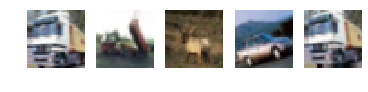

In [44]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_ctrain_conv[1:5], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()